In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('/content/laptops_dataset_final_600.csv')

In [6]:
df.head(20)

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...
5,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Super!,Super product
6,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Super!,Go for it..its awesome
7,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Mind-blowing purchase,"Best , best and best 🫶🏻👑🍎"
8,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Just wow!,Its really very good and compact device.
9,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Brilliant,"Superb built quality, Amazing performance and ..."


In [7]:
df_1 = df[df['rating'] == df['rating'].min()]

In [8]:
df_1['review']

,review
204,"Heating problem, battery backup not good , man..."
206,Heating issue and not performing according to ...
210,Verry slow working dont buy this products
213,Dont take any product in flipkart
217,worst product\nworst customer care service\ndo...
...,...
24025,Please don't purchase it ... After one month t...
24027,Mouse pad was working automatically not requir...
24069,Received faulty machine with faulty battery wh...
24082,"Waste of money to buy product from flipkart,ho..."


In [9]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

In [11]:
sc = SentimentIntensityAnalyzer()

## tokenize

In [12]:
df_1['tokenized_review'] = df_1['review'].apply(word_tokenize)

<ipython-input-12-0d9ceb33890c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['tokenized_review'] = df_1['review'].apply(word_tokenize)


In [13]:
df_1['tokenized_review'].head()

,tokenized_review
204,"[Heating, problem, ,, battery, backup, not, go..."
206,"[Heating, issue, and, not, performing, accordi..."
210,"[Verry, slow, working, dont, buy, this, products]"
213,"[Dont, take, any, product, in, flipkart]"
217,"[worst, product, worst, customer, care, servic..."


In [14]:
def analyze_sentiment(tokens):
    """Analyzes the sentiment of a list of tokens and returns the sentiment scores."""
    from nltk.corpus import stopwords  # Import stopwords inside the function
    filtered_tokens = [w for w in tokens if not w in stopwords.words('english')]
    text = " ".join(filtered_tokens)  # Join the tokens back into a string
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores

df_1['sentiment'] = df_1['tokenized_review'].apply(analyze_sentiment)
# The following lines were likely copied by mistake, remove or adjust as needed
# sentiment_scores = sia.polarity_scores(text)
# return sentiment_scores
# df_1['sentiment'] = df_1['tokenized_review'].apply(SentimentIntensityAnalyzer)

<ipython-input-14-6d69ee17b35f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['sentiment'] = df_1['tokenized_review'].apply(analyze_sentiment)


In [15]:
df_1.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review,tokenized_review,sentiment
204,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Very poor,"Heating problem, battery backup not good , man...","[Heating, problem, ,, battery, backup, not, go...","{'neg': 0.233, 'neu': 0.517, 'pos': 0.25, 'com..."
206,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Worst experience ever!,Heating issue and not performing according to ...,"[Heating, issue, and, not, performing, accordi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
210,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Don't waste your money,Verry slow working dont buy this products,"[Verry, slow, working, dont, buy, this, products]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
213,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Did not meet expectations,Dont take any product in flipkart,"[Dont, take, any, product, in, flipkart]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
217,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Useless product,worst product\nworst customer care service\ndo...,"[worst, product, worst, customer, care, servic...","{'neg': 0.5, 'neu': 0.305, 'pos': 0.195, 'comp..."


In [16]:

from transformers import pipeline

In [17]:
sentiment_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [18]:
df_1['senti'] = df_1['review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
<ipython-input-18-334f6c9c09ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['senti'] = df_1['review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


In [19]:
result = sentiment_pipeline(df_1['review'].iloc[0])
result

[{'label': 'NEGATIVE', 'score': 0.9996306896209717}]

In [20]:
df_1.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review,tokenized_review,sentiment,senti
204,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Very poor,"Heating problem, battery backup not good , man...","[Heating, problem, ,, battery, backup, not, go...","{'neg': 0.233, 'neu': 0.517, 'pos': 0.25, 'com...",NEGATIVE
206,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Worst experience ever!,Heating issue and not performing according to ...,"[Heating, issue, and, not, performing, accordi...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEGATIVE
210,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Don't waste your money,Verry slow working dont buy this products,"[Verry, slow, working, dont, buy, this, products]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEGATIVE
213,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Did not meet expectations,Dont take any product in flipkart,"[Dont, take, any, product, in, flipkart]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NEGATIVE
217,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,4.2,"3,899",279,1,Useless product,worst product\nworst customer care service\ndo...,"[worst, product, worst, customer, care, servic...","{'neg': 0.5, 'neu': 0.305, 'pos': 0.195, 'comp...",NEGATIVE


In [21]:
df.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...


In [24]:
df_2 = df[['rating','review']]

In [26]:
df_2['sentiment'] = df_2['review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

<ipython-input-26-a8d3b09265a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['sentiment'] = df_2['review'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


In [27]:
df_2.head(20)

,rating,review,sentiment
0,5,"Loved it, it's my first MacBook that I earned ...",POSITIVE
1,5,Battery lasted longer than my first relationsh...,POSITIVE
2,5,Such a great deal.. very happy with the perfor...,POSITIVE
3,4,"Awesome build quality and very good display, b...",POSITIVE
4,5,When i ordered and came to know about seller r...,POSITIVE
5,5,Super product,POSITIVE
6,5,Go for it..its awesome,POSITIVE
7,5,"Best , best and best 🫶🏻👑🍎",POSITIVE
8,5,Its really very good and compact device.,POSITIVE
9,5,"Superb built quality, Amazing performance and ...",POSITIVE


## graphs

<Axes: xlabel='sentiment', ylabel='Count'>

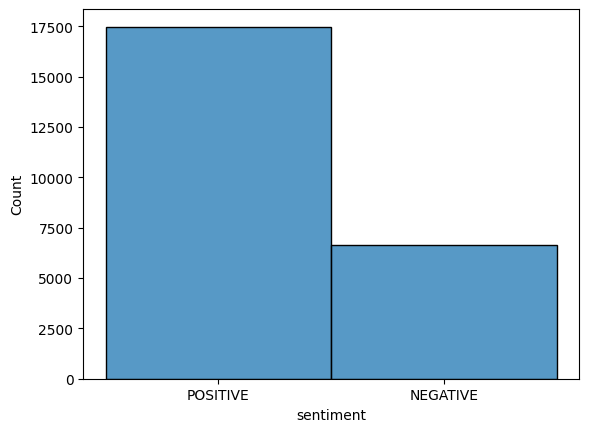

In [34]:
sns.histplot(df_2['sentiment'])

<Axes: ylabel='rating'>

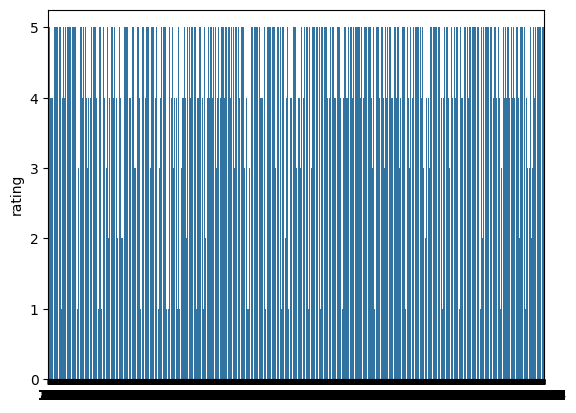

In [39]:
sns.barplot(df_2['rating'])